In [19]:
import pandas as pd
import seaborn as sns

## All columns

In [20]:
penguins = sns.load_dataset("penguins")
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


### fill in NaN's

In [21]:
penguins["sex"] = penguins["sex"].fillna("unknown")
penguins = penguins.fillna(0)
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,0.0,0.0,0.0,0.0,unknown
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


## predicting species

### set up the model

In [22]:
from sklearn.tree import DecisionTreeClassifier as dtc

In [24]:
from sklearn import tree 
import graphviz

def plot_tree_classification(model, features, class_names) :
    dot_data = tree.export_graphviz(model, out_file=None,
                                   feature_names=features,
                                   class_names=class_names,
                                   filled=True, rounded=True,
                                   special_characters=True)
    graph = graphviz.Source(dot_data)
    graph.render("decision_tree")
    return graph

In [30]:
def calculate_accuracy(predictions, actuals):
    if(len(predictions) != len(actuals)):
        raise Exception("The amount of predictions did not equal the amount of actuals")
    
    return (predictions == actuals).sum() / len(actuals)

### test/train split

In [26]:
from sklearn.model_selection import train_test_split as tts

In [27]:
penguin_train, penguin_test = tts(penguins, test_size = 0.3, stratify=penguins['species'], random_state = 44)
print (penguin_train.shape, penguin_test.shape)

(240, 7) (104, 7)


In [28]:
features = ['bill_length_mm']
dt = dtc(max_depth=3)
dt.fit(penguin_train[features], penguin_train['species'])

DecisionTreeClassifier(max_depth=3)

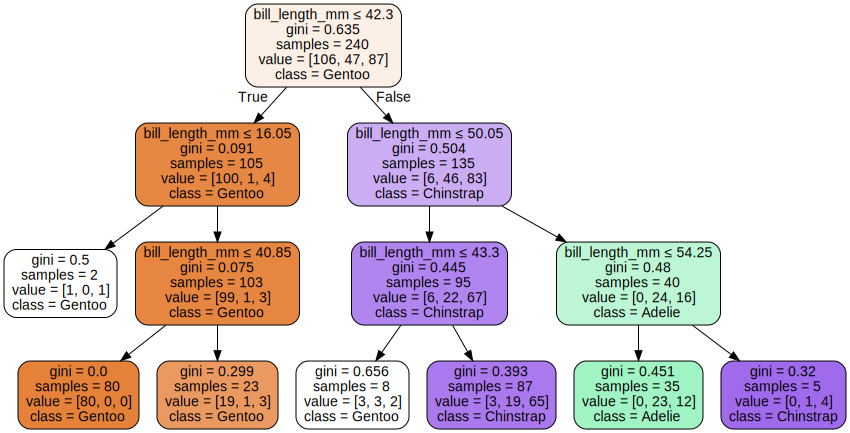

In [34]:
plot_tree_classification(dt, features, penguin_test.species.unique())

In [33]:
predictOnTrainSet = dt.predict(penguin_train[features])
predictOnTestSet = dt.predict(penguin_test[features])

accuracyTrain = calculate_accuracy(predictOnTrainSet, penguin_train.species)
accuracyTest = calculate_accuracy(predictOnTestSet, penguin_test.species)

print("Accuracy on training set: " + str(accuracyTrain))
print("Accuracy on test set: " + str(accuracyTest))

Accuracy on training set: 0.8125
Accuracy on test set: 0.7211538461538461


## predicting sex

In [35]:
penguin_train, penguin_test = tts(penguins, test_size = 0.3, stratify=penguins['sex'], random_state = 44)
print (penguin_train.shape, penguin_test.shape)

(240, 7) (104, 7)


In [36]:
features = ['flipper_length_mm']
dt = dtc(max_depth=3)
dt.fit(penguin_train[features], penguin_train['sex'])

DecisionTreeClassifier(max_depth=3)

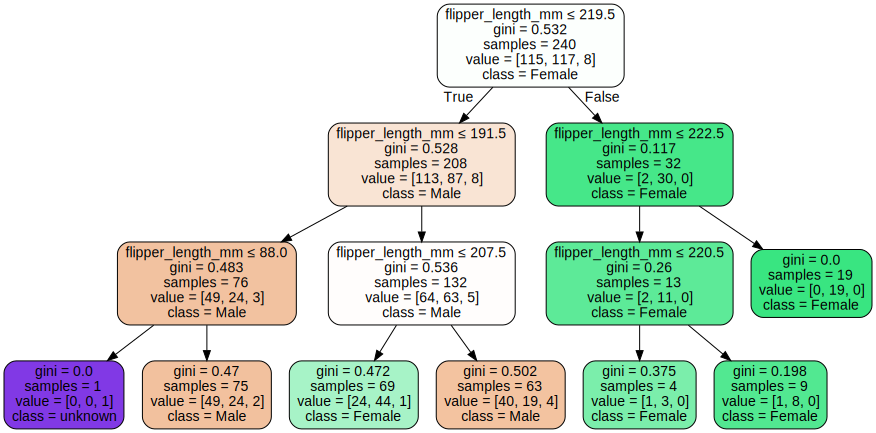

In [37]:
plot_tree_classification(dt, features, penguin_test.sex.unique())

In [38]:
predictOnTrainSet = dt.predict(penguin_train[features])
predictOnTestSet = dt.predict(penguin_test[features])

accuracyTrain = calculate_accuracy(predictOnTrainSet, penguin_train.sex)
accuracyTest = calculate_accuracy(predictOnTestSet, penguin_test.sex)

print("Accuracy on training set: " + str(accuracyTrain))
print("Accuracy on test set: " + str(accuracyTest))

Accuracy on training set: 0.6833333333333333
Accuracy on test set: 0.6730769230769231
